In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from pathlib import Path

import biograpy
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.Seq import Seq

savefig = False

/home/mweber/local/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
if False:
    fig1, ax = plt.subplots(figsize=(10,3), dpi=300)

    ax.scatter(x=list(range(0, 1200)), y=np.random.random(1200))
    ax.set_xlim([0,1200])
    ax.set_ylim([0,2])

    # We use the package biograpy to plot Panel, tracks, and features
    panel = biograpy.Panel(fig1)
    track = biograpy.tracks.BaseTrack()

    track.add_feature(biograpy.features.Simple(name='Simple1', start = 50, end = 300))

    genefeat = SeqFeature(FeatureLocation(100,500), type='gene', strand=1)
    track.add_feature(biograpy.features.GeneSeqFeature(genefeat, name='GeneSeqFeature1'))

    track.add_feature(biograpy.features.Simple(name='Simple_colored1', start = 500, end = 820, color_by_cm=False, fc='r'))

    track.add_feature(biograpy.features.GeneSeqFeature(genefeat,name='GeneSeqFeature2_colored',fc='r'))

    genefeat = SeqFeature(FeatureLocation(800,810), type='gene', strand=1)
    track.add_feature(biograpy.features.GeneSeqFeature(genefeat, name='GeneSeqFeature_very_short'))

    CDS_feature = SeqFeature(FeatureLocation(180,1000), type='CDS', strand=-1)
    mRNA_feature = SeqFeature(FeatureLocation(180,1100), type='mRNA', strand=-1)
    mRNAandCDSfeat = biograpy.features.CoupledmRNAandCDS(mRNA_feature, CDS_feature, name='CoupledmRNAandCDS1_strandm', ec='k')
    track.add_feature(mRNAandCDSfeat)

    CDS_feature = SeqFeature( FeatureLocation(200,600), type='CDS', strand=1)
    mRNA_feature = SeqFeature( FeatureLocation(100,800), type='mRNA', strand=1)
    mRNAandCDSfeat = biograpy.features.CoupledmRNAandCDS(mRNA_feature, CDS_feature, name='CoupledmRNAandCDS1_strandp_colored', ec='r', fc='r')
    track.add_feature(mRNAandCDSfeat)

    CDS_feature = SeqFeature( FeatureLocation(250,260), type='CDS', strand=1)
    mRNA_feature = SeqFeature( FeatureLocation(220,300), type='mRNA', strand=1)
    mRNAandCDSfeat = biograpy.features.CoupledmRNAandCDS(mRNA_feature, CDS_feature, name='CoupledmRNAandCDS1_very_short')
    track.add_feature(mRNAandCDSfeat)

    geneSeqfeat = SeqFeature( FeatureLocation(900,200), type = 'gene', strand=-1)
    genefeat = biograpy.features.GeneSeqFeature(geneSeqfeat, name='GeneSeqFeature3_strandm')
    track.add_feature(genefeat)

    track2 = biograpy.tracks.BaseTrack(biograpy.features.Simple(name='Simple3_track2', start= 0, end = 80))

    panel.add_track(track)
    panel.add_track(track2)
    if savefig:
        panel.save('biograpy_test1.png')
        panel.close()
    else:
        panel._draw_tracks()


    fig1, ax = plt.subplots(figsize=(11,3), dpi=400)

    ax.scatter(x=list(range(0, 100)), y=np.random.random(100))
    ax.set_xlim([0,100])
    ax.set_ylim([0,2])

    ##############################################

    panel = biograpy.Panel(fig1)
    track = biograpy.tracks.BaseTrack()

    track.add_feature(biograpy.features.TextSequence(
            'MKKVIVIGVNHAGTSFIRTLLSKSKDFQVNAYDRNTNISFLGCGIALAVSGVVKNTEDLFYSTPEELKAMGANVFMAHDVVGLDLDKKQVIVKDL',
            start=10, name="TextSequence1"))

    # There is one limitation to our text features, is that the font size is calculated when creating the
    # PrettyTextSequence object, based on the current axis. Therefore, we cannot re-use the PrettyTextSequence
    # in another Panel, for example. Possibly in another track with the same dimensions should be ok.
    prettyTextFeat = biograpy.features.PrettyTextSequence(
        list('KSKDFQVNAYDRN') +
        [('A', {'fontproperties':FontProperties(**{'weight':'bold'}), 'size':20}),
        ('A', {})] + list('CGIALAVTE') +
        [('A', {'fontproperties':FontProperties(**{'weight':'bold', 'size':36})})] +    # this gets overridden by automatic font size
        [(c, {'bbox':dict(facecolor='blue', alpha=0.4, edgecolor='none', pad=0.0)}) for c in list('ATGCATGC')] +
        list('KSKDFQVNAYDRN') +
        [(c, {'color':'red'}) for c in list('ATGCATGC')] +
        ['B', 'R', 'G', 'C', 'T', 'T', 'A', 'G', 'C'] +
        list('MKKVIVIGVNHAGTSFIRTLLSKSKDFQVNAYDRNTNISFLGCGIALAVSGVVKNTEDLFYSTPEELKAMGANVFMAHDVVGLDLDKKQVIVKDLATGKETVDHY'),
        start=20, name='PrettyTextSequence1')
    track.add_feature(prettyTextFeat)

    panel.add_track(track)
    if savefig:
        panel.save('biograpy_test2.png')
        panel.close()
    else:
        panel._draw_tracks()

    ##############################################


    # Here we test the exact same plot but with a longer range in the x axis, in order
    # to test the automatic font size of the sequence features.

    fig1, ax = plt.subplots(figsize=(11,3), dpi=400)

    ax.scatter(x=list(range(0, 200)), y=np.random.random(200))
    ax.set_xlim([0,200])
    ax.set_ylim([0,2])

    # We use the package biograpy to plot Panel, tracks, and features
    panel = biograpy.Panel(fig1)
    track = biograpy.tracks.BaseTrack()

    track.add_feature(biograpy.features.TextSequence(
            'MKKVIVIGVNHAGTSFIRTLLSKSKDFQVNAYDRNTNISFLGCGIALAVSGVVKNTEDLFYSTPEELKAMGANVFMAHDVVGLDLDKKQVIVKDLATGKETVDHYDQLVVASGAWPICMNVENEVTHTQLQFNHTDKYCGNIKNLISCKLYQHALTLIDSFRHDKSIKSVAIVGSGYIGLELAEAAWQCGKQVTVIDMLDKPAGNNFDEEFTNELEKAMKKAGINLMMGSAVKGFIVDADKNVVKGVETDKGRVDADLVIQSIGFRPNTQFVPKDRQFEFNRNGSIKVNEYLQALNHENVYVIGGAAAIYDAASEQYENIDLATNAVKSGLVAAMHMIGSKAVKLESIVGTNALHVFGLNLAATGLTEKRAKM',
            start=10, name="TextSequence1"))

    prettyTextFeat = biograpy.features.PrettyTextSequence(
        list('KSKDFQVNAYDRN') +
        [('A', {'fontproperties':FontProperties(**{'weight':'bold'}), 'size':20}),
        ('A', {})] + list('CGIALAVTE') +
        [('A', {'fontproperties':FontProperties(**{'weight':'bold', 'size':36})})] +    # this gets overridden by automatic font size
        [(c, {'bbox':dict(facecolor='blue', alpha=0.4, edgecolor='none', pad=0.0)}) for c in list('ATGCATGC')] +
        list('KSKDFQVNAYDRN') +
        [(c, {'color':'red'}) for c in list('ATGCATGC')] +
        ['B', 'R', 'G', 'C', 'T', 'T', 'A', 'G', 'C'] +
        list('MKKVIVIGVNHAGTSFIRTLLSKSKDFQVNAYDRNTNISFLGCGIALAVSGVVKNTEDLFYSTPEELKAMGANVFMAHDVVGLDLDKKQVIVKDLATGKETVDHY'),
        start=20, name='PrettyTextSequence1')
    track.add_feature(prettyTextFeat)

    panel.add_track(track)
    if savefig:
        panel.save('biograpy_test2b.png')
        panel.close()
    else:
        panel._draw_tracks()

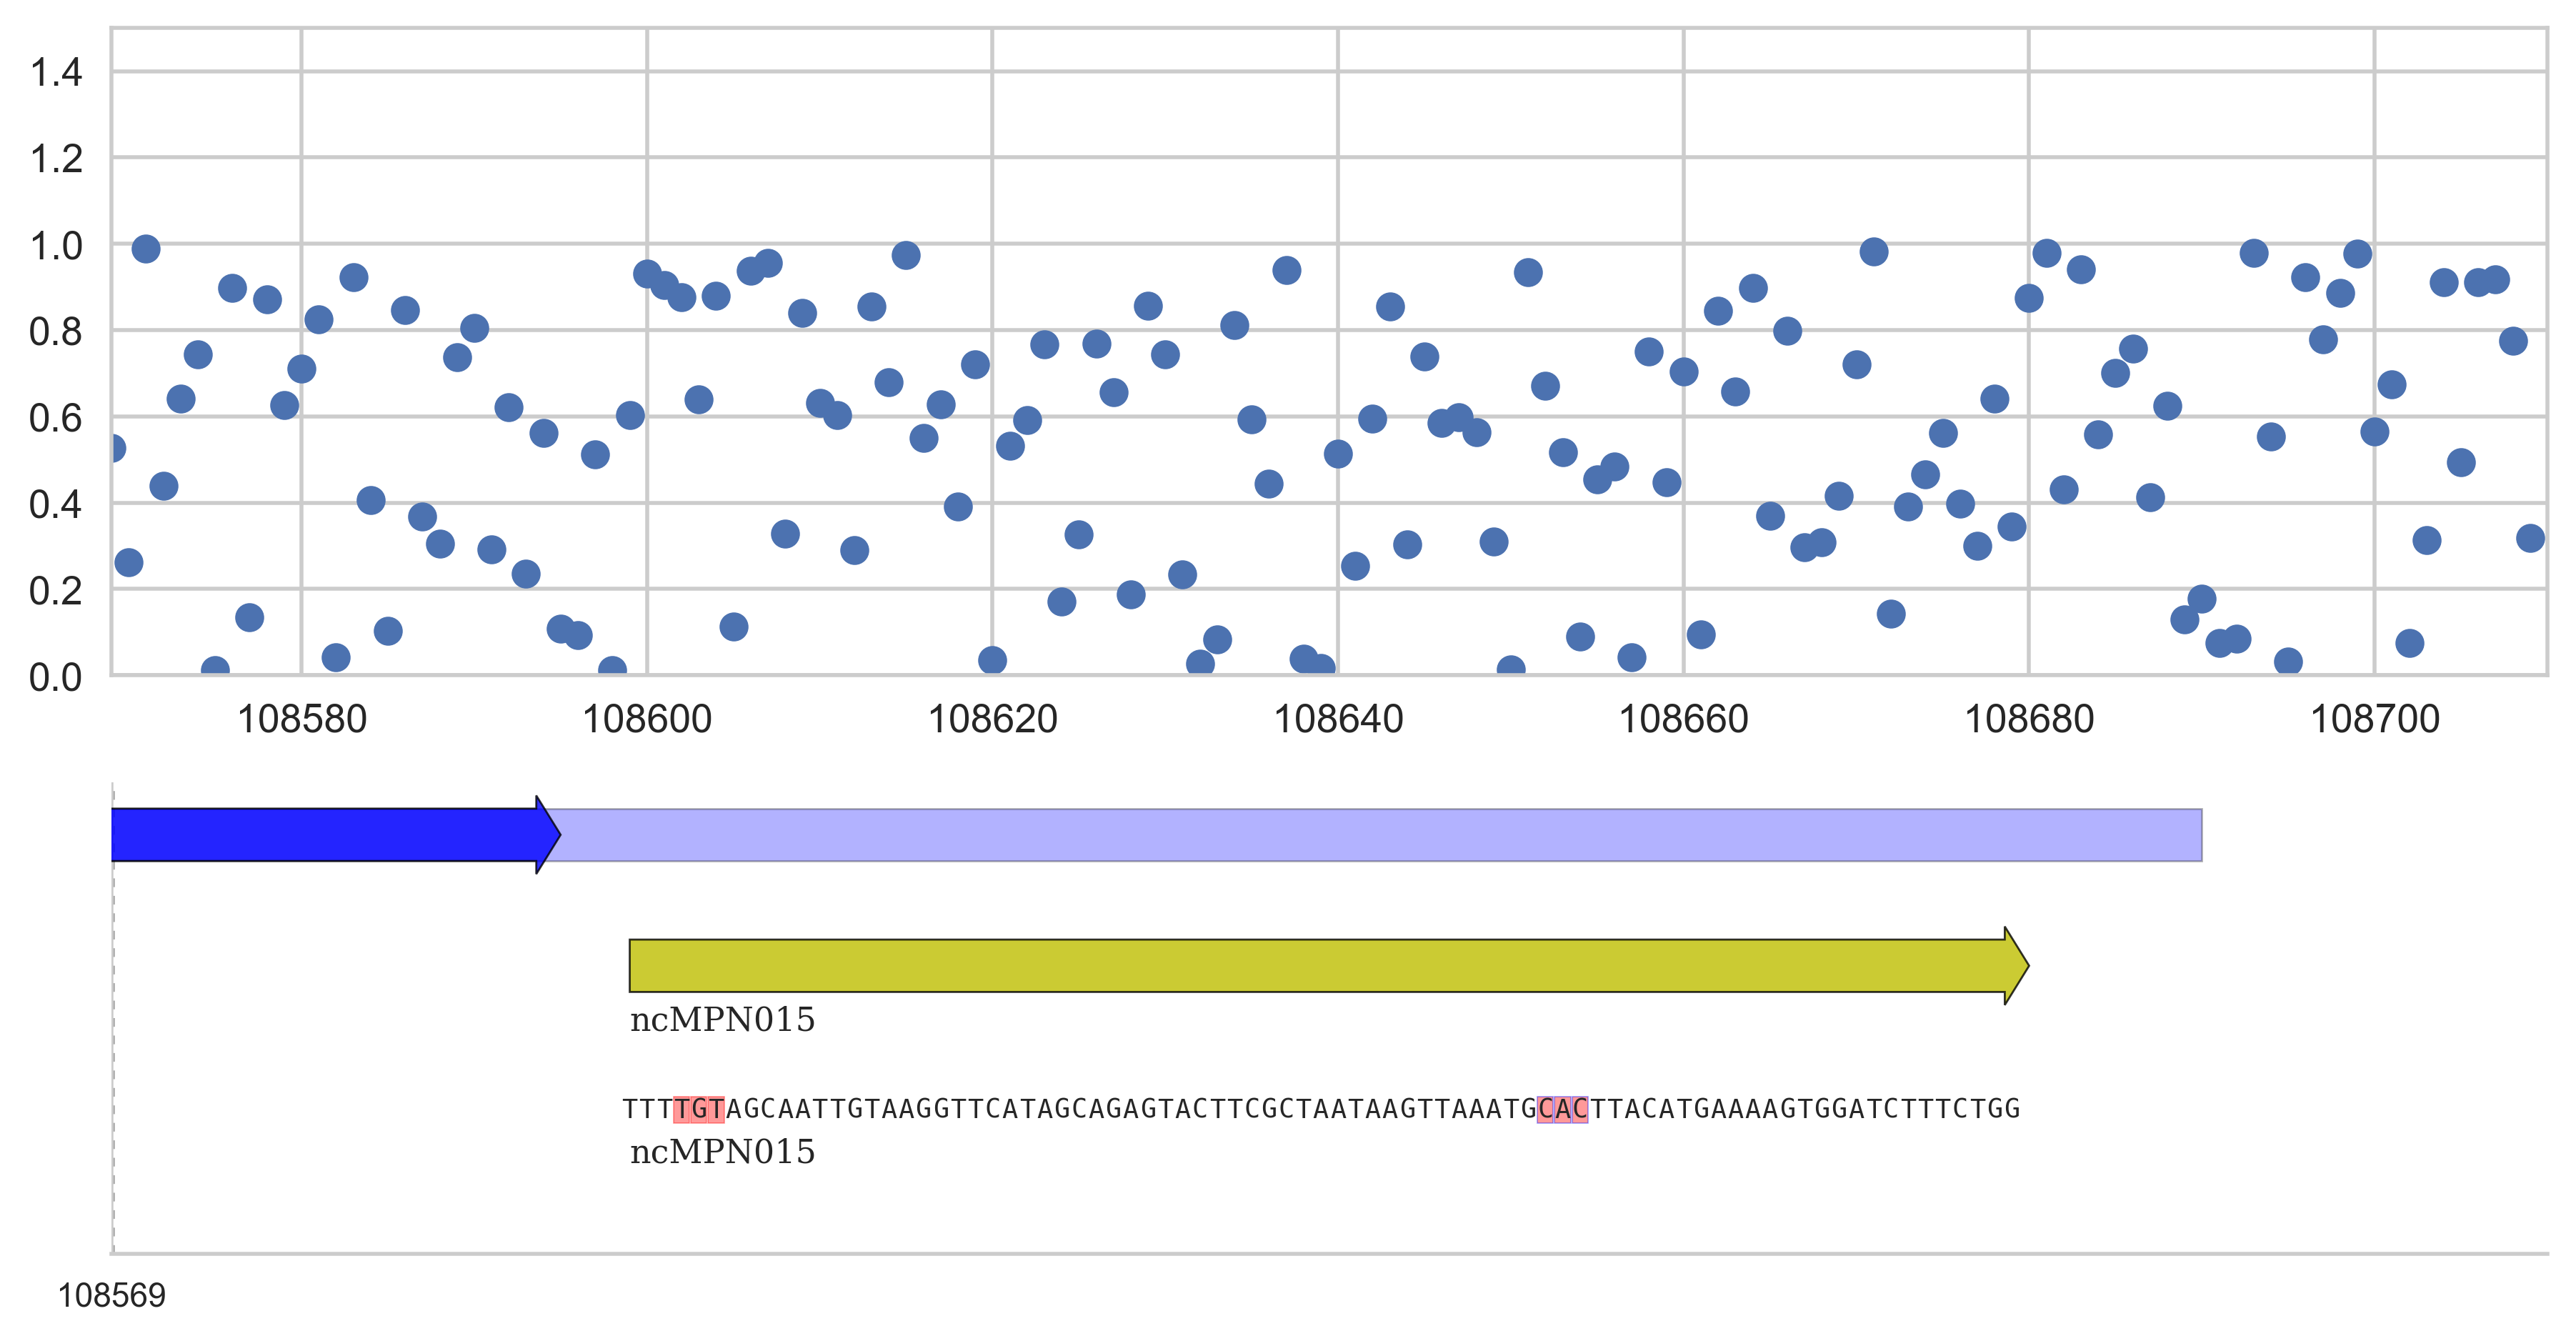

In [4]:
##############################################

# We also test the MPN annotations
import json
import pandas as pd
from mwTools.mpn_annotation_tools import plot_add_annotations
from mwTools.paths import p
p = p('isis')
mpnAnnotationPath = p.mpnAnnotationPath

# Import annotations
with (mpnAnnotationPath / 'mpnAnnotFeaturesDf6ColList.json').open('r') as f:
    mpnAnnotFeaturesDf6ColList = json.load(f)
mpnAnnotFeaturesDf = pd.read_json(str(mpnAnnotationPath / 'mpnAnnotFeaturesDf6B.json'))[mpnAnnotFeaturesDf6ColList]


mpnPlot = mpnAnnotFeaturesDf[(mpnAnnotFeaturesDf.id == 'ncMPN015') &
                             (mpnAnnotFeaturesDf.feature == 'ncRNA')
                            ].iloc[0]

xPad = 30
x0 = mpnPlot['start'] - xPad
x1 = mpnPlot['end'] + xPad

fig1, ax = plt.subplots(figsize=(11,3), dpi=400)
ax.scatter(x=list(range(x0, x1)), y=np.random.random(x1 - x0))
ax.set_xlim([x0, x1])
ax.set_ylim([0, 1.5])

DNAFeatList = [('ncMPN015',
    [{'start':53 + mpnPlot['start'], 'end':56 + mpnPlot['start'],
      'fontPropDict':{'bbox':dict(facecolor='red', alpha=0.4, edgecolor='blue', pad=0.0)}},
     {'start':3 + mpnPlot['start'], 'end':6 + mpnPlot['start'], 'highlightColor':'red'}
    ]
                )]
    
plot_add_annotations(ax=ax, fig=fig1, mpnAnnotFeaturesDf=mpnAnnotFeaturesDf, ncRNA=True, idCol='id',
                     DNAFeatList=DNAFeatList)